In [28]:
## Import relevant libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Scikit-learn

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import statsmodels as sm
from sklearn import utils
from statsmodels import tools

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import roc_auc_score,roc_curve,f1_score

%matplotlib inline

np.random.seed(100)

In [2]:
# Your code comes here
filename = "C://Users//Priyanka Popeta//Downloads//adult.data"
column_names = ["age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country","class"]
bureaudata = pd.read_csv(filename, sep=",",header=None)
bureaudata.reset_index()
bureaudata.columns = column_names

In [3]:
bureaudata.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
bureaudata.drop('education',axis=1,inplace=True)

In [5]:
bureaudata=bureaudata.replace(" ?",np.nan)
bureaudata=bureaudata.replace("? ",np.nan)
bureaudata=bureaudata.replace(" ? ",np.nan)
bureaudata=bureaudata.replace("?",np.nan)
bureaudata.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
class                0
dtype: int64

<AxesSubplot:>

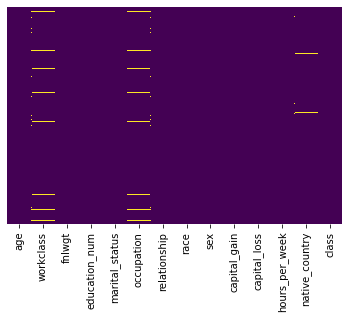

In [6]:
sns.heatmap(bureaudata.isnull(),yticklabels=False,cbar=False,cmap='viridis')

We can see that the data has null values, we will have to clean the data

<AxesSubplot:>

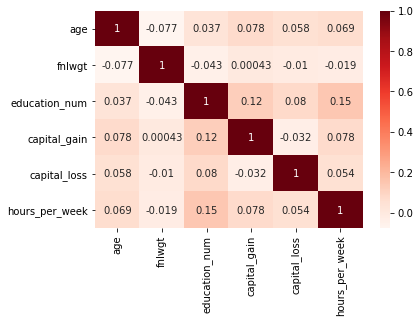

In [7]:
corr=bureaudata.corr()
sns.heatmap(corr,cmap=plt.cm.Reds,annot=True)

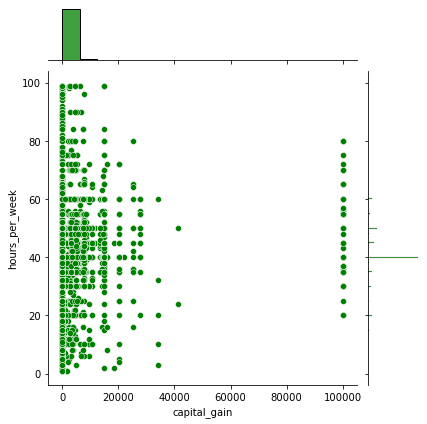

In [8]:
sns.jointplot(x='capital_gain',y='hours_per_week',data=bureaudata,color='green')

<AxesSubplot:>

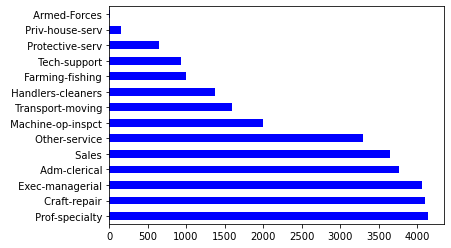

In [9]:
bureaudata["occupation"].value_counts().plot.barh(color="blue")

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

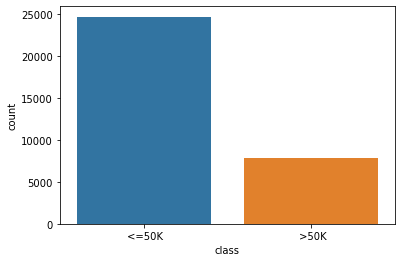

In [10]:
sns.countplot(bureaudata["class"])

In [11]:
cbdataclean=pd.get_dummies(bureaudata,columns=["workclass","marital_status","occupation","relationship","race","native_country"])
cbdataclean.head()

,age,fnlwgt,education_num,sex,capital_gain,capital_loss,hours_per_week,class,workclass_ Federal-gov,workclass_ Local-gov,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,39,77516,13,Male,2174,0,40,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,Male,0,0,13,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,Male,0,0,40,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,Male,0,0,40,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,Female,0,0,40,<=50K,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
cbdataclean=pd.get_dummies(cbdataclean,columns=["sex","class"],drop_first=True)

cbdataclean.rename({"sex_ Male":"male","class_ >50K":"class"},axis=1,inplace=True)

In [13]:
cbdataclean.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,male,class
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

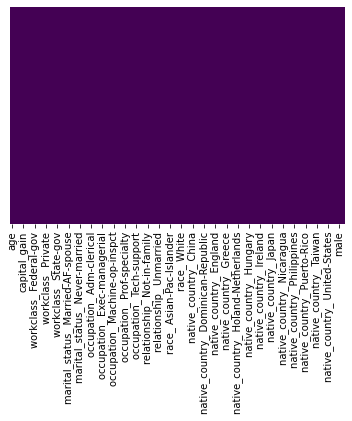

In [14]:
sns.heatmap(cbdataclean.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
X=cbdataclean.drop(columns=["class"],axis=1)
X["education_num"]=X["education_num"].astype("int")
y=cbdataclean["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3) 

In [16]:
num=bureaudata.select_dtypes(include=["int64"]).columns

trans=MinMaxScaler()
numeric_X_train=pd.DataFrame(trans.fit_transform(X_train[num]),columns=num,index=X_train.index)
X_train_new=pd.concat([numeric_X_train,X_train.iloc[:,6:]],axis=1)
X_train_new=pd.concat([X_train_new,X_train["education_num"]],axis=1)

numeric_X_test=pd.DataFrame(trans.fit_transform(X_test[num]),columns=num,index=X_test.index)
X_test_new=pd.concat([numeric_X_test,X_test.iloc[:,6:]],axis=1)
X_test_new=pd.concat([X_test_new,X_test["education_num"]],axis=1)


print("X_train rows :",X_train_new.shape[0])
print("X_test rows :",X_test_new.shape[0])

X_train rows : 22792
X_test rows : 9769


In [20]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lrmodel = LogisticRegression()
lrmodel.fit(X_train_new, y_train)
y_predictions = lrmodel.predict(X_test_new)
score_LR = lrmodel.score(X_test_new,y_test)
print('The accuracy of the Logistic Regression model is', score_LR)
targets = ['<=50k' , '>50k']

The accuracy of the Logistic Regression model is 0.8510594738458389


E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


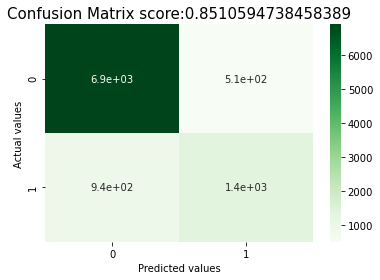

In [24]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_predictions)

sns.heatmap(cm, annot=True,  cmap = "Greens");
plt.ylabel('Actual values');
plt.xlabel('Predicted values');
ctitle = 'Confusion Matrix score:'+str(accuracy_score(y_test,y_predictions))
plt.title(ctitle, size = 15);
plt.show()

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predictions))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7428
           1       0.73      0.60      0.66      2341

    accuracy                           0.85      9769
   macro avg       0.81      0.76      0.78      9769
weighted avg       0.84      0.85      0.85      9769



In [29]:
#improving the accuracy
hgb=HistGradientBoostingClassifier(random_state=50,)
hgb_model=hgb.fit(X_train_new,y_train)
y_pred=hgb_model.predict(X_test_new)

hgb_train_score=hgb_model.score(X_train_new,y_train)
hgb_accuracy_score=accuracy_score(y_test,y_pred)
hgb_f1_score=f1_score(y_test,y_pred)

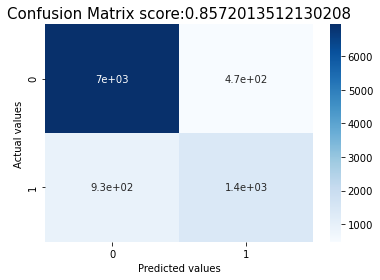

In [30]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True,  cmap = "Blues");
plt.ylabel('Actual values');
plt.xlabel('Predicted values');
ctitle = 'Confusion Matrix score:'+str(accuracy_score(y_test,y_pred))
plt.title(ctitle, size = 15);
plt.show()

In [31]:
print(classification_report(y_test, y_pred,target_names=targets))

              precision    recall  f1-score   support

       <=50k       0.88      0.94      0.91      7428
        >50k       0.75      0.60      0.67      2341

    accuracy                           0.86      9769
   macro avg       0.82      0.77      0.79      9769
weighted avg       0.85      0.86      0.85      9769



In [32]:
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("Model score:",hgb_model.score(X_train_new,y_train))
print("f1 score:",f1_score(y_test,y_pred))

Accuracy Score: 0.8572013512130208
Model score: 0.8888645138645138
f1 score: 0.6698224852071006
